In [3]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [47]:
from keras.datasets import reuters
from keras import preprocessing

# Number of words to consider as features
max_features = 15000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 100

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


In [49]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import *
from keras import layers

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(15000, 128, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
#model.add(Flatten())

# We add the classifier on top

model.add(layers.LSTM(32))
#model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu', input_dim=100))
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

score = model.evaluate(x_test, y_test,
                       batch_size=32, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 100, 128)          1920000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_62 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_63 (Dense)             (None, 46)                2990      
Total params: 1,945,710
Trainable params: 1,945,710
Non-trainable params: 0
_________________________________________________________________
Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 61s 9ms/step - loss: 2.4288 - acc: 0.4014 - val_loss: 1.9809 - val_acc: 0.4825
Epoch 2/10
7185/7185 [==============================] - 60s 8ms/step - loss: 1.83

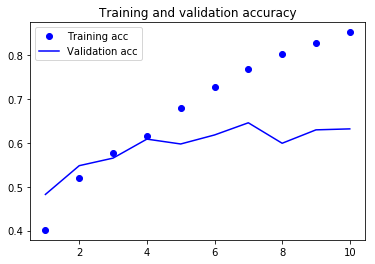

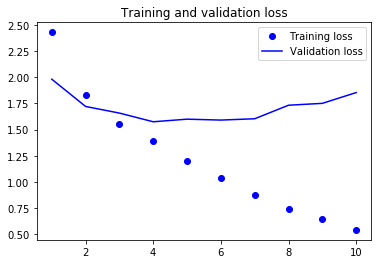

In [50]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()